In [31]:
from pandas import read_csv,DataFrame,read_excel, merge,concat, Series
import os
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [32]:
datacsv          = "peru_ap17/"
data_peru        = "peru_data/"
list_csv         = os.listdir(datacsv)

In [33]:
figures = "figures/"
if not os.path.exists(figures):
    os.makedirs(pngfolder)

In [34]:
allinfo=read_csv("allinfo_peru.csv")

In [35]:
cluster1 = np.array([i in [195, 567, 568, 569, 570, 572, 719, 720] for i in allinfo.ScenarioID])
cluster2 = np.array([i in [135,136,138,139,140,545,654] for i in allinfo.ScenarioID])
cluster3 = np.array([i in [124, 126, 131, 622, 623, 624, 642, 643, 645]+list(range(594,621))\
                     for i in allinfo.ScenarioID])
cluster4 = np.array([i in [271,272] for i in allinfo.ScenarioID])

# Water levels

In [153]:
link=418
water418 = DataFrame(index=[5,10,25,50,100,250,500,1000],\
                  columns=['EU_historical','GFDL_8.5','HadGEM2_8.5','IPSL_8.5'])
for climat in ['EU_historical','GFDL_8.5','HadGEM2_8.5','IPSL_8.5']:
    for RP in [5,10,25,50,100,250,500,1000]:
        col = "{}_RP{} (cm)".format(climat,RP)
        water418.loc[RP,climat]=allinfo.ix[(allinfo.ScenarioID==str(link))&\
                                       (allinfo.partial_or_full=="full"),col].values[0]

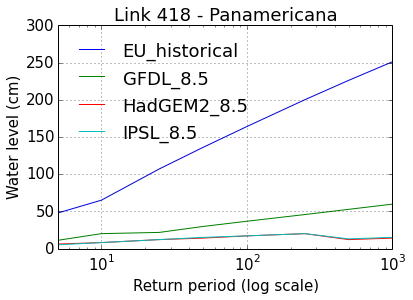

In [154]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(10,10))
water418.plot(logx=True,title="Link 418 - Panamericana")
plt.xlabel("Return period (log scale)")
plt.ylabel("Water level (cm)")
plt.legend(frameon=False,loc=2)
plt.savefig(figures+"water_level_418.png",dpi=300)

In [155]:
link="cluster3"
water3 = DataFrame(index=[5,10,25,50,100,250,500,1000],\
                  columns=['EU_historical','GFDL_8.5','HadGEM2_8.5','IPSL_8.5'])
for climat in ['EU_historical','GFDL_8.5','HadGEM2_8.5','IPSL_8.5']:
    for RP in [5,10,25,50,100,250,500,1000]:
        col = "{}_RP{} (cm)".format(climat,RP)
        water3.loc[RP,climat]=allinfo.ix[(allinfo.ScenarioID==str(link))&\
                                       (allinfo.partial_or_full=="full"),col].values[0]

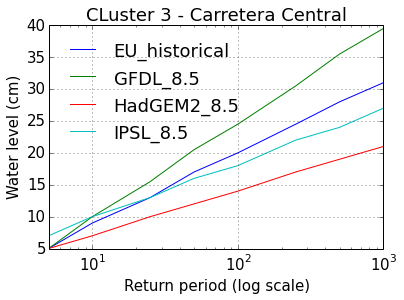

In [219]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(10,10))
water3.plot(logx=True,title="CLuster 3 - Carretera Central")
plt.xlabel("Return period (log scale)")
plt.ylabel("Water level (cm)")
plt.legend(frameon=False,loc=2)
plt.savefig(figures+"water_level_cluster3.png",dpi=300,bbox_inches="tight")

In [157]:
link="cluster4"
water4 = DataFrame(index=[5,10,25,50,100,250,500,1000],\
                  columns=['EU_historical','GFDL_8.5','HadGEM2_8.5','IPSL_8.5'])
for climat in ['EU_historical','GFDL_8.5','HadGEM2_8.5','IPSL_8.5']:
    for RP in [5,10,25,50,100,250,500,1000]:
        col = "{}_RP{} (cm)".format(climat,RP)
        water4.loc[RP,climat]=allinfo.ix[(allinfo.ScenarioID==str(link))&\
                                       (allinfo.partial_or_full=="full"),col].values[0]

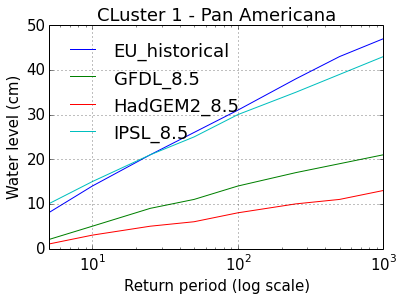

In [218]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(10,10))
water4.plot(logx=True,title="CLuster 1 - Pan Americana")
plt.xlabel("Return period (log scale)")
plt.ylabel("Water level (cm)")
plt.legend(frameon=False,loc=2)
plt.savefig(figures+"water_level_cluster4.png",dpi=300,bbox_inches="tight")

# Second part: calculation of expected annual losses

In [36]:
allinfo.ix[[i in [418,"cluster4","cluster3"] for i in allinfo.ScenarioID],\
           ["ruc_increase","missingroutes","num_aff_routes","cost_with_traffic","km_diff"]].to_csv("table1.csv")

The function below creates the step function between water level and % of traffic redirected to the second best road

In [37]:
def steps(cm,redirection):
    if redirection==0:
        if cm<5:
            percent = 0
        elif (cm>=5)&(cm<15):
            percent = 0.3
        elif (cm>=15)&(cm<25):
            percent = 0.5
        elif (cm>=25)&(cm<40):
            percent = 0.8
        else:
            percent = 1
    elif redirection==1:
        if cm<3:
            percent = 0
        elif (cm>=3)&(cm<10):
            percent = 0.4
        elif (cm>=10)&(cm<20):
            percent = 0.6
        elif (cm>=20)&(cm<30):
            percent = 0.9
        else:
            percent = 1
    elif redirection==2:
        if cm<2:
            percent = 0
        elif (cm>=2)&(cm<10):
            percent = 0.5
        elif (cm>=10)&(cm<15):
            percent = 0.7
        elif (cm>=15)&(cm<25):
            percent = 0.9
        else:
            percent = 1
    return percent

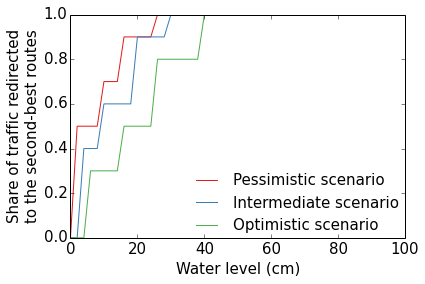

In [38]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(6,4))

xx = range(0,100,2)
plt.plot(xx,[steps(i,2) for i in xx],label="Pessimistic scenario",color="#e41a1c")
plt.plot(xx,[steps(i,1) for i in xx],label="Intermediate scenario",color="#377eb8")
plt.plot(xx,[steps(i,0) for i in xx],label="Optimistic scenario",color="#4daf4a")



plt.xlabel("Water level (cm)")
plt.ylabel("Share of traffic redirected\nto the second-best routes")
plt.legend(bbox_to_anchor=[0.52,-0.15,0.5,0.5],frameon=False,fontsize=15)
plt.savefig(figures+"traffic_scenarios.png",bbox_inches="tight",dpi=400)

The function below creates the function between water level and duration of the disruption

In [91]:
from scipy.interpolate import InterpolatedUnivariateSpline
def days(length):
    s = InterpolatedUnivariateSpline([0, 5, 30, 50, 200], [0,3*length,15*length,40*length,365*length], k=1)
    return s

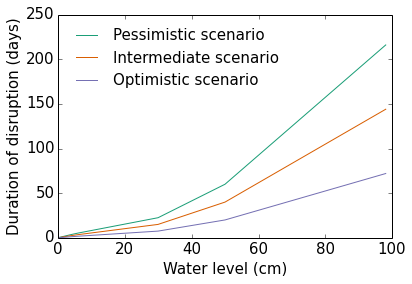

In [40]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(6,4))

xx = range(0,100,2)
s=days(1.5)
plt.plot(xx,[s(i,0) for i in xx],label="Pessimistic scenario",color='#1b9e77')
s=days(1)
plt.plot(xx,[s(i,0) for i in xx],label="Intermediate scenario",color='#d95f02')
s2=days(0.5)
plt.plot(xx,[s2(i,0) for i in xx],label="Optimistic scenario",color='#7570b3')

plt.xlabel("Water level (cm)")
plt.ylabel("Duration of disruption (days)")
plt.legend(bbox_to_anchor=[0.2,0.5,0.5,0.5],frameon=False,fontsize=15)
plt.savefig(figures+"duration_scenarios.png",bbox_inches="tight",dpi=400)

Here I hard coded the costs of reconstruction and rehabilitation based on the Columbian data

In [41]:
allinfo.ix[[i in [418,"cluster4","cluster3"] for i in allinfo.ScenarioID],"reconstruction"]=783225.0174
allinfo.ix[[i in [418,"cluster4","cluster3"] for i in allinfo.ScenarioID],"rehabilitation"]=359061.4644

In [42]:
allinfo.ix[[i in [418,"cluster4","cluster3"]],['STATUS', 'TERRAIN', 'SURFACE1', 'COND1', 'CLASS',"reconstruction","rehabilitation"]]\
.to_csv("conditions.csv")

This function calculates expected annual losses based on losses per return period

In [43]:
def annual_losses(expected_losses,losses_col):
    '''
    Calculates expected annual losses based on losses per return period event.
    '''
    cost=expected_losses.copy()
    #keeps the last two points for extrapolation
    #sorts rows by return period
    cost.sort(columns='RP', inplace=True)
    cost.index=range(len(cost))
    cost['frequency']=1/cost['RP']
    #calculates the integral using the trapeze method
    inte=0
    for i in range(1,len(cost)):
        trapeze =(cost.loc[i-1,'frequency']-cost.loc[i,'frequency'])*(cost.loc[i,losses_col]+cost.loc[i-1,losses_col])/2
        inte += trapeze
    inte += cost.loc[len(cost)-1,losses_col]*cost.loc[len(cost)-1,'frequency']
    return inte

In [44]:
def choose_costs(allinfo,col,link):
    all_costs = Series(index=['full_disruption','partial_disruption'])
    all_costs['full_disruption'] = allinfo.ix[(allinfo.ScenarioID==link)&\
                                                 (allinfo.partial_or_full=="full"),col].values[0]
    all_costs['partial_disruption'] = allinfo.ix[(allinfo.ScenarioID==link)&\
                                                 (allinfo.partial_or_full=="partial")&\
                                                 (allinfo.part_ruc_increase==0.05),col].values[0]
    return all_costs

This function calculates the total losses for a given water level

In [92]:
def totcost(link,cm,s,all_costs,redirection,km,reconstruction,rehabilitation):
    tot = s(cm)*(all_costs["full_disruption"]*(steps(cm,redirection))+\
          all_costs["partial_disruption"]*(1-steps(cm,redirection)))
    redirect_during_work = 0.1*(1+redirection)
    if s(cm)>7:
        tot += reconstruction*km + 30*km*((1-redirect_during_work)*all_costs["partial_disruption"]+\
                                          redirect_during_work*all_costs["full_disruption"])
    else:
        tot += rehabilitation*km + 10*km*((1-redirect_during_work)*all_costs["partial_disruption"]+\
                                          redirect_during_work*all_costs["full_disruption"])
    return tot 

This function calculates everything

In [105]:
def summarize_costs(link,col,allinfo,climat,redirection,length):
    s = days(length)
    select = (allinfo.ScenarioID==link)&(allinfo.partial_or_full=="full")
    all_costs = choose_costs(allinfo,col,link)
    summary = DataFrame(columns=["RP","cost"])
    for rp in [5,10,25,50,100,250,500,1000]:
        cm = allinfo.ix[select,climat+'_RP'+str(rp)+' (cm)'].values[0]
        km = float(allinfo.ix[select,'KM'].values[0])
        reconstruction = allinfo.ix[select,'reconstruction'].values[0]
        rehabilitation = allinfo.ix[select,'rehabilitation'].values[0]
        summary.loc[len(summary),:]=[rp,totcost(link,cm,s,all_costs,redirection,km,\
                                    reconstruction,rehabilitation)]                                      
    return summary

This function runs all scenarios

In [106]:
def run_scenarios(link,col):
    out = DataFrame(columns=['redirection','climat','length','exp_annual_losses'])

    for redirection in [0,1,2]:
        for climat in ['EU_historical','GFDL_8.5','HadGEM2_8.5','IPSL_8.5']:
            for length in [1.5,1,0.5]:
                summary = summarize_costs(link,col,allinfo,climat,redirection,length)
                out.loc[len(out),:]=[redirection,climat,length,\
                                 10**(-6)*annual_losses(summary,"cost")]
    return out

# cluster 3

In [220]:
link = "cluster3"
col = "cost_with_traffic"
out = run_scenarios(link,col)

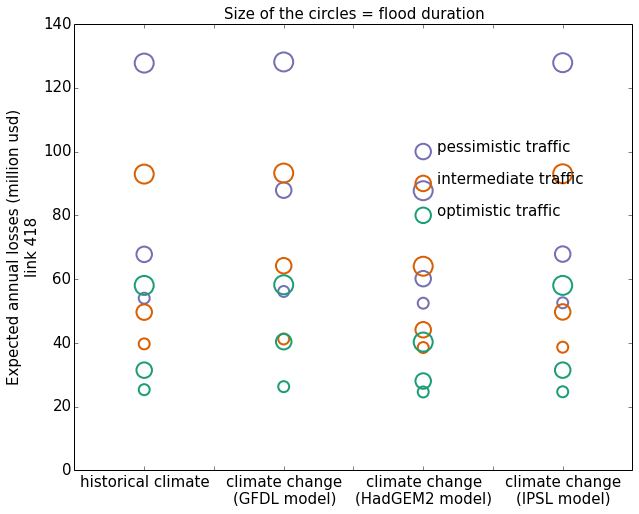

In [108]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(10,8))

ax=plt.subplot(111)
j=0

sizes = [120*(i+1.) for i in range(3)]
labels = list()
for dur in ["optimistic","intermediate","pessimistic"]:
    labels.append("{} duration".format(dur))

for climat in ['EU_historical']:
    subout = out.ix[out.climat==climat,:]
    grouped = subout.groupby("length")
    for i, (name, group) in enumerate(grouped):
        ax.scatter([j]*len(group.ix[group.redirection==0,'exp_annual_losses']),\
                   group.ix[group.redirection==0,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#1b9e77',linewidth='2')
        ax.scatter([j]*len(group.ix[group.redirection==1,'exp_annual_losses']),group.ix[group.redirection==1,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#d95f02',linewidth='2')
        ax.scatter([j]*len(group.ix[group.redirection==2,'exp_annual_losses']),group.ix[group.redirection==2,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#7570b3',linewidth='2')
    j+=1
        
for climat in ['GFDL_8.5','HadGEM2_8.5','IPSL_8.5']:
    subout = out.ix[out.climat==climat,:]
    grouped = subout.groupby("length")
    for i, (name, group) in enumerate(grouped):
        ax.scatter([j]*len(group.ix[group.redirection==0,'exp_annual_losses']),group.ix[group.redirection==0,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#1b9e77',linewidth='2')
        ax.scatter([j]*len(group.ix[group.redirection==1,'exp_annual_losses']),group.ix[group.redirection==1,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#d95f02',linewidth='2')
        ax.scatter([j]*len(group.ix[group.redirection==2,'exp_annual_losses']),group.ix[group.redirection==2,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#7570b3',linewidth='2')
    
    #ax.scatter([i]*len(subout.ix[subout.redirection==2,'exp_annual_losses']),subout.ix[subout.redirection==2,'exp_annual_losses'],\
         #marker='o',s=100*subout.ix[subout.redirection==2,'length'],facecolors='none',edgecolors='#e41a1c',alpha=0.5)
    j+=1
    
ax.scatter([j-2],[1*10**(2)],marker='o',s=2*120,facecolors='none',edgecolors='#7570b3',linewidth='2')
ax.annotate("pessimistic traffic",xy=(j-1.9,1*10**(2)))
ax.scatter([j-2],[0.9*10**(2)],marker='o',s=2*120,facecolors='none',edgecolors='#d95f02',linewidth='2')
ax.annotate("intermediate traffic",xy=(j-1.9,0.9*10**(2)))
ax.scatter([j-2],[0.8*10**(2)],marker='o',s=2*120,facecolors='none',edgecolors='#1b9e77',linewidth='2')
ax.annotate("optimistic traffic",xy=(j-1.9,0.8*10**(2)))

labelsx = [item.get_text() for item in ax.get_xticklabels()]
labelsx[1]="historical climate"
labelsx[3]="climate change\n(GFDL model)"
labelsx[5]="climate change\n(HadGEM2 model)"
labelsx[7]="climate change\n(IPSL model)"

#ax.legend(bbox_to_anchor=[0.5,0.5,0.5,0.5])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1],frameon=False)

ax.set_xticklabels(labelsx)

plt.title("Size of the circles = flood duration",size=15)
plt.ylabel("Expected annual losses (million usd) \nlink 418")

#plt.savefig("results_418.png",bbox_inches="tight",dpi=400)

### Interventions

Here I hard code intervention costs (in million usd)

In [159]:
intervention_costs = Series()
intervention_costs["maintenance"] = 10**(-6)*70089.18
intervention_costs["flood_proof"] = 10**(-6)*1283832.70
intervention_costs["improvement"] = 10**(-6)*500607.68

This function calculates the NPVs of the three possible interventions

In [176]:
def f(x):
    diff=x.ix[x.length==1.5,"exp_annual_losses"].values[0]\
    -x.ix[x.length==0.5,"exp_annual_losses"].values[0]
    return diff

select = (allinfo.ScenarioID==link)&(allinfo.partial_or_full=="full")

disc_fact = np.array([1/(1.05)**i for i in range(1,years+1)])

reduce_duration = out.groupby(["redirection","climat"]).apply(lambda x:f(x))
disc_reduce_duration = [sum(np.array(30*[l])*disc_fact) for l in reduce_duration]

maintenance = sum(np.array(years*[intervention_costs.maintenance*\
                                  allinfo.ix[select,"KM"].astype(float)])*disc_fact)


In [184]:
def calc_all_npv(years,allinfo,out,link,intervention_costs):
    def f(x):
        diff=x.ix[x.length==1.5,"exp_annual_losses"].values[0]\
        -x.ix[x.length==0.5,"exp_annual_losses"].values[0]
        return diff
    
    select = (allinfo.ScenarioID==link)&(allinfo.partial_or_full=="full")
    
    disc_fact = np.array([1/(1.05)**i for i in range(1,years+1)])
        
    reduce_duration = out.groupby(["redirection","climat"]).apply(lambda x:f(x))
    disc_reduce_duration = [sum(np.array(30*[l])*disc_fact) for l in reduce_duration]
   
    maintenance = sum(np.array(years*[intervention_costs.maintenance*\
                                      allinfo.ix[select,"KM"].astype(float)])*disc_fact)
    npv_maintenance = disc_reduce_duration-maintenance.values[0]
    
    maintenance2ndbest = np.array(years*[intervention_costs.maintenance*\
                                         allinfo.ix[select,"km_diff"].astype(float)])*disc_fact
    flood_proof = intervention_costs.flood_proof*allinfo.ix[select,"KM"].astype(float)+maintenance
    redundancy = allinfo.ix[select,"km_diff"].astype(float)*intervention_costs.improvement+\
                 sum(maintenance2ndbest)
    disc_losses = [sum(np.array(30*[l])*disc_fact) for l in out.exp_annual_losses]
    npv_flood_proof = disc_losses-flood_proof.values[0]
    npv_redunduncy = disc_losses-redundancy.values[0]
    return disc_losses,npv_maintenance,npv_flood_proof,npv_redunduncy

I calculate the NPVs with different cost increase factors

In [191]:
allinfo.ix[(allinfo.ScenarioID=="cluster3")&(allinfo.partial_or_full=="full"),"KM"]

970    84.30982867245459
Name: KM, dtype: object

In [246]:
years = 30
disc_losses,npv_maintenance0,npv_flood_proof0,npv_redunduncy0 = calc_all_npv(years,allinfo,out,"cluster3",intervention_costs)
disc_losses,npv_maintenance1,npv_flood_proof1,npv_redunduncy1 = calc_all_npv(years,allinfo,out,"cluster3",intervention_costs*1.5)
disc_losses,npv_maintenance2,npv_flood_proof2,npv_redunduncy2 = calc_all_npv(years,allinfo,out,"cluster3",intervention_costs*2)

npv_maintenance = np.concatenate((npv_maintenance0,npv_maintenance1,npv_maintenance2),axis=0)
npv_flood_proof = np.concatenate((npv_flood_proof0,npv_flood_proof1,npv_flood_proof2),axis=0)
npv_redunduncy = np.concatenate((npv_redunduncy0,npv_redunduncy1,npv_redunduncy2),axis=0)

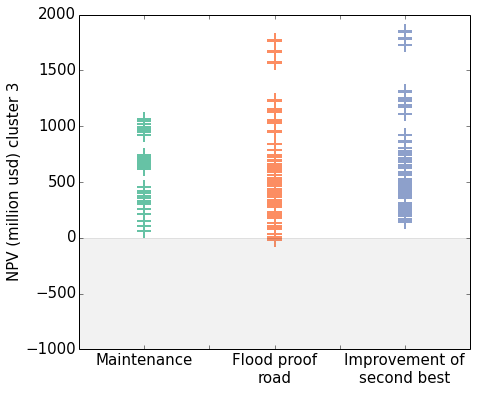

In [204]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(7,6))

ax=plt.subplot(111)

ax.scatter([0]*len(npv_maintenance),npv_maintenance,\
                 marker='+',s=200,facecolors='none',edgecolors='#66c2a5',linewidth='2')

ax.scatter([1]*len(npv_flood_proof),npv_flood_proof,\
                 marker='+',s=200,facecolors='none',edgecolors='#fc8d62',linewidth='2')

ax.scatter([2]*len(npv_redunduncy),npv_redunduncy,\
                 marker='+',s=200,facecolors='none',edgecolors='#8da0cb',linewidth='2')
    
ax.fill_between(np.arange(-1,4,1), 0, -1000, facecolor='grey', alpha=0.1)
ax.set_xlim([-0.5,2.5])
ax.set_ylim([-1000,2000])

labelsx = [item.get_text() for item in ax.get_xticklabels()]
labelsx[1]="Maintenance"
labelsx[3]="Flood proof\nroad"
labelsx[5]="Improvement of\nsecond best"


ax.set_xticklabels(labelsx)
plt.ylabel("NPV (million usd) cluster 3")

plt.savefig(figures+"NPV_cluster3.png",bbox_inches="tight",dpi=400)

Here I calculate regret

In [247]:
print(-min(npv_flood_proof)/max(disc_losses))
print(-min(npv_maintenance)/max(disc_losses))
print(-min(npv_redunduncy)/max(disc_losses))

0.0101573164562
-0.0299288075123
-0.0703907198671


In [248]:
print(-min(npv_flood_proof))
print(-min(npv_maintenance))
print(-min(npv_redunduncy))

20.0021930249
-58.9370024499
-138.616215415


## Analysis for cluster4

In [221]:
link = "cluster4"
col = "cost_with_traffic"
out4 = run_scenarios(link,col)

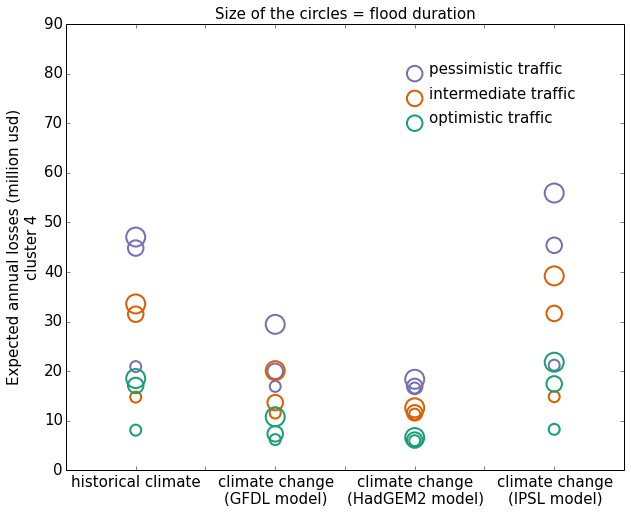

In [196]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(10,8))

ax=plt.subplot(111)
j=0

sizes = [120*(i+1.) for i in range(3)]
labels = list()
for dur in ["optimistic","intermediate","pessimistic"]:
    labels.append("{} duration".format(dur))

for climat in ['EU_historical']:
    subout = out4.ix[out4.climat==climat,:]
    grouped = subout.groupby("length")
    for i, (name, group) in enumerate(grouped):
        ax.scatter([j]*len(group.ix[group.redirection==0,'exp_annual_losses']),group.ix[group.redirection==0,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#1b9e77',linewidth='2')
        ax.scatter([j]*len(group.ix[group.redirection==1,'exp_annual_losses']),group.ix[group.redirection==1,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#d95f02',linewidth='2')
        ax.scatter([j]*len(group.ix[group.redirection==2,'exp_annual_losses']),group.ix[group.redirection==2,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#7570b3',linewidth='2')
    j+=1
        
for climat in ['GFDL_8.5','HadGEM2_8.5','IPSL_8.5']:
    subout = out4.ix[out4.climat==climat,:]
    grouped = subout.groupby("length")
    for i, (name, group) in enumerate(grouped):
        ax.scatter([j]*len(group.ix[group.redirection==0,'exp_annual_losses']),group.ix[group.redirection==0,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#1b9e77',linewidth='2')
        ax.scatter([j]*len(group.ix[group.redirection==1,'exp_annual_losses']),group.ix[group.redirection==1,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#d95f02',linewidth='2')
        ax.scatter([j]*len(group.ix[group.redirection==2,'exp_annual_losses']),group.ix[group.redirection==2,'exp_annual_losses'],\
                 marker='o',s=sizes[i],facecolors='none',edgecolors='#7570b3',linewidth='2')
    
    #ax.scatter([i]*len(subout.ix[subout.redirection==2,'exp_annual_losses']),subout.ix[subout.redirection==2,'exp_annual_losses'],\
         #marker='o',s=100*subout.ix[subout.redirection==2,'length'],facecolors='none',edgecolors='#e41a1c',alpha=0.5)
    j+=1
    
ax.scatter([j-2],[0.8*10**(2)],marker='o',s=2*120,facecolors='none',edgecolors='#7570b3',linewidth='2')
ax.annotate("pessimistic traffic",xy=(j-1.9,0.8*10**(2)))
ax.scatter([j-2],[0.75*10**(2)],marker='o',s=2*120,facecolors='none',edgecolors='#d95f02',linewidth='2')
ax.annotate("intermediate traffic",xy=(j-1.9,0.75*10**(2)))
ax.scatter([j-2],[0.7*10**(2)],marker='o',s=2*120,facecolors='none',edgecolors='#1b9e77',linewidth='2')
ax.annotate("optimistic traffic",xy=(j-1.9,0.7*10**(2)))

labelsx = [item.get_text() for item in ax.get_xticklabels()]
labelsx[1]="historical climate"
labelsx[3]="climate change\n(GFDL model)"
labelsx[5]="climate change\n(HadGEM2 model)"
labelsx[7]="climate change\n(IPSL model)"

#ax.legend(bbox_to_anchor=[0.5,0.5,0.5,0.5])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1],frameon=False)

ax.set_xticklabels(labelsx)

plt.title("Size of the circles = flood duration",size=15)
plt.ylabel("Expected annual losses (million usd) \ncluster 4")

plt.savefig(figures+"results_cluster4.png",bbox_inches="tight",dpi=400)

In [224]:
years = 30
disc_losses,npv_maintenance0,npv_flood_proof0,npv_redunduncy0 = calc_all_npv(years,allinfo,out4,"cluster4",intervention_costs)
disc_losses,npv_maintenance1,npv_flood_proof1,npv_redunduncy1 = calc_all_npv(years,allinfo,out4,"cluster4",intervention_costs*1.5)
disc_losses,npv_maintenance2,npv_flood_proof2,npv_redunduncy2 = calc_all_npv(years,allinfo,out4,"cluster4",intervention_costs*2)

npv_maintenance = np.concatenate((npv_maintenance0,npv_maintenance1,npv_maintenance2),axis=0)
npv_flood_proof = np.concatenate((npv_flood_proof0,npv_flood_proof1,npv_flood_proof2),axis=0)
npv_redunduncy = np.concatenate((npv_redunduncy0,npv_redunduncy1,npv_redunduncy2),axis=0)

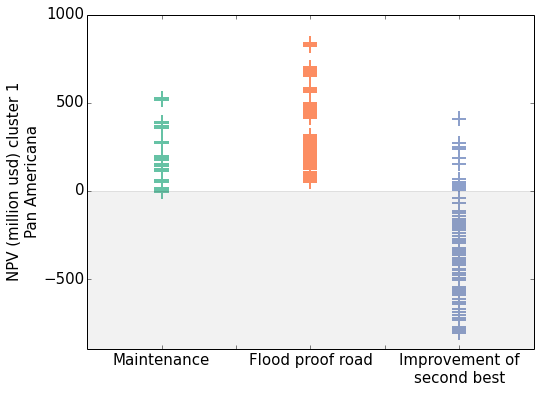

In [230]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(8,6))

ax=plt.subplot(111)

ax.scatter([0]*len(npv_maintenance),npv_maintenance,\
                 marker='+',s=200,facecolors='none',edgecolors='#66c2a5',linewidth='2')

ax.scatter([1]*len(npv_flood_proof),npv_flood_proof,\
                 marker='+',s=200,facecolors='none',edgecolors='#fc8d62',linewidth='2')

ax.scatter([2]*len(npv_redunduncy),npv_redunduncy,\
                 marker='+',s=200,facecolors='none',edgecolors='#8da0cb',linewidth='2')
    
ax.fill_between(np.arange(-1,4,1), 0, -900, facecolor='grey', alpha=0.1)
ax.set_xlim([-0.5,2.5])
ax.set_ylim([-900,1000])

labelsx = [item.get_text() for item in ax.get_xticklabels()]
labelsx[1]="Maintenance"
labelsx[3]="Flood proof road"
labelsx[5]="Improvement of\nsecond best"


ax.set_xticklabels(labelsx)
plt.ylabel("NPV (million usd) cluster 1\nPan Americana")

plt.savefig(figures+"NPV_cluster4.png",bbox_inches="tight",dpi=400)

In [231]:
print(-min(npv_flood_proof)/max(disc_losses))
print(-min(npv_maintenance)/max(disc_losses))
print(-min(npv_redunduncy)/max(disc_losses))

-0.0610845762019
0.00984775653742
0.938514923974


In [232]:
print(-min(npv_flood_proof))
print(-min(npv_maintenance))
print(-min(npv_redunduncy))

-52.5112420987
8.46560555574
806.792605438


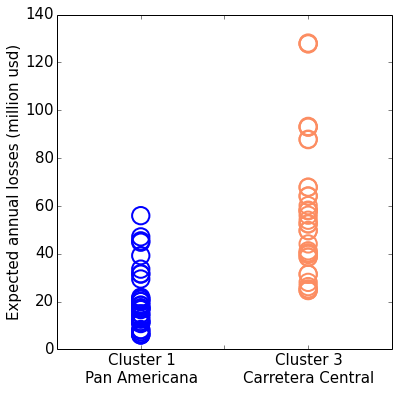

In [244]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(6,6))

ax=plt.subplot(111)

ax.scatter([1]*len(out.exp_annual_losses),out.exp_annual_losses,\
                 marker='o',s=300,facecolors='none',edgecolors='#fc8d62',linewidth='2')

ax.scatter([0]*len(out4.exp_annual_losses),out4.exp_annual_losses,\
                 marker='o',s=300,facecolors='none',edgecolors='blue',linewidth='2')

ax.set_xlim([-0.5,1.5])
ax.set_ylim([0,140])

labelsx = [item.get_text() for item in ax.get_xticklabels()]
labelsx[1]="Cluster 1\nPan Americana"
labelsx[3]="Cluster 3\nCarretera Central"

ax.set_xticklabels(labelsx)

plt.ylabel("Expected annual losses (million usd)")

plt.savefig(figures+"EL.png",bbox_inches="tight",dpi=400)

In [245]:
out.ix[out.exp_annual_losses>80,:]

,redirection,climat,length,exp_annual_losses
12,1,EU_historical,1.5,92.92997
15,1,GFDL_8.5,1.5,93.25257
21,1,IPSL_8.5,1.5,93.02436
24,2,EU_historical,1.5,127.7405
27,2,GFDL_8.5,1.5,128.1019
28,2,GFDL_8.5,1,87.88468
30,2,HadGEM2_8.5,1.5,87.71754
33,2,IPSL_8.5,1.5,127.8702


# link 418

In [214]:
allinfo.ix[allinfo.ScenarioID=='418',["cost_with_traffic","partial_or_full","part_ruc_increase"]]

,cost_with_traffic,partial_or_full,part_ruc_increase
420,1772088.689520,full,0.00
421,9494.548278,partial,0.50
422,0.000000,partial,0.05


In [211]:
allinfo.ix[(allinfo.ScenarioID=='418')&(allinfo.part_ruc_increase==0.05),"cost_with_traffic"]=0

In [215]:
link = '418'
col = "cost_with_traffic"
out418 = run_scenarios(link,col)

In [216]:
out418

,redirection,climat,length,exp_annual_losses
0,0,EU_historical,1.5,NaN
1,0,EU_historical,1,NaN
2,0,EU_historical,0.5,NaN
3,0,GFDL_8.5,1.5,NaN
4,0,GFDL_8.5,1,NaN
5,0,GFDL_8.5,0.5,NaN
6,0,HadGEM2_8.5,1.5,NaN
7,0,HadGEM2_8.5,1,NaN
8,0,HadGEM2_8.5,0.5,NaN
9,0,IPSL_8.5,1.5,NaN
